In [60]:
using DifferentialEquations
using Plots
using BenchmarkTools

In [7]:
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,2.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob, #=Tsit5()=#alg_hints=[:lsoda], reltol=1e-8, abstol=1e-8)

retcode: Success
Interpolation: specialized 7th order lazy interpolation, specialized 3rd order "free" stiffness-aware interpolation
t: 13-element Vector{Float64}:
 0.0
 0.04348646169583638
 0.1526936808307447
 0.296020303210646
 0.4519355451720559
 0.6294421350410089
 0.8196004491763167
 1.0232692323861057
 1.236261351086943
 1.4574509639381121
 1.684599891552551
 1.916527555322048
 2.0
u: 13-element Vector{Float64}:
 0.5
 0.5224500727537101
 0.5833741318168794
 0.6742416681049924
 0.7892341138265524
 0.9442062758368742
 1.144135434909801
 1.4054460759177356
 1.742771712460159
 2.1790266647186955
 2.740933922401388
 3.4644214545820238
 3.7691624668730896

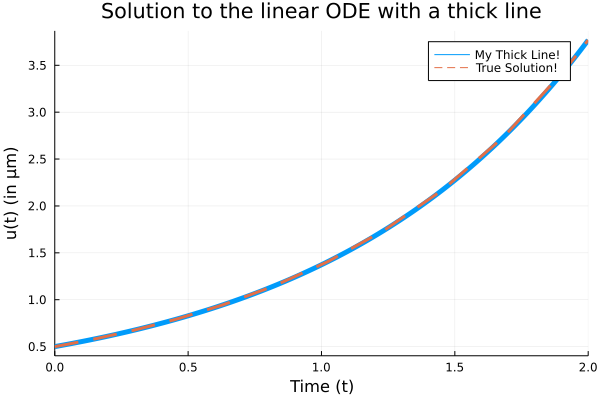

In [4]:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

In [5]:
function lorenz!(du,u,p,t)
    du[1] = 10.0*(u[2]-u[1])
    du[2] = u[1]*(28.0-u[3]) - u[2]
    du[3] = u[1]*u[2] - (8/3)*u[3]
   end

lorenz! (generic function with 1 method)

In [14]:
u02 = [1.0;0.0;0.0]
tspan2 = (0.0,100.0)
prob2 = ODEProblem(lorenz!,u02,tspan2)
sol2 = solve(prob2)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1289-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624087100077666
   0.009058076582749423
   0.016956470605311864
   0.027689959227781235
   0.04185635103821218
   0.060240410627700816
   0.0836854113984534
   ⋮
  99.5412045549744
  99.6085310903818
  99.67192934036703
  99.72954041869967
  99.78291962638104
  99.84176034083528
  99.90666445162192
  99.98069072555015
 100.0
u: 1289-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591550149778, 0.08977063252764937, 0.0001438019170127846]
 [0.924204355043198, 0.242289149116772, 0.0010461625397616113]
 [0.8800455796215916, 0.4387364900041282, 0.0034242599668253874]
 [0.8483309836977301, 0.6915629475762161, 0.008487624

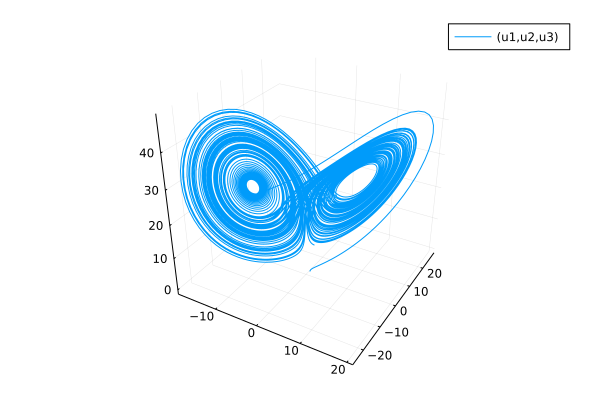

In [15]:
plot(sol2,vars=(1,2,3))

In [35]:
#flame propagation in flame
flame(u,p,t) = u^2 - u^3
u0_flame = 0.01
t = (0.0, 2/u0_flame)
flame_prob = ODEProblem(flame,u0_flame,t)
flame_solution = solve(flame_prob,Tsit5(), reltol=1e-4, abstol=1e-4) 

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 42-element Vector{Float64}:
   0.0
   0.3997028416407085
   4.396731258047794
  25.497741044139552
  55.43235570382296
  80.38294534245186
  91.87575109198781
  98.46042711194507
 101.14166101535267
 103.06381433608169
   ⋮
 173.22165224320173
 176.7065940637079
 180.19215508831755
 183.68248378418667
 187.1778588131573
 190.67637807361768
 194.17574541445134
 197.67438899839559
 200.0
u: 42-element Vector{Float64}:
 0.01
 0.010039726987264977
 0.010454977460813116
 0.01336967480881802
 0.02204050557041621
 0.04716257306440894
 0.09553285453201919
 0.20850533939824345
 0.35219302917118306
 0.5624751373483503
 ⋮
 0.9999449890575264
 0.9999460924001419
 0.9999471341933173
 0.9999477219475627
 0.9999478361895693
 0.999947653317542
 0.9999473852179523
 0.9999471804033815
 0.9999914885854043

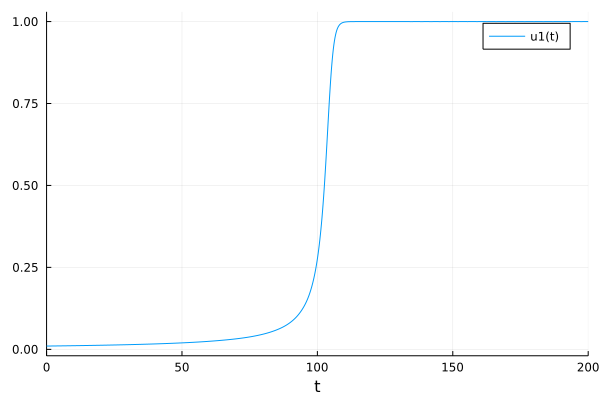

In [36]:
plot(flame_solution)

#The next function is optimized one because -->
1. the derivative dz is not returned yet inlined --> so lower allocations
2. dz is imbedded inside function along with z[1]
3. remember array is indexed with 1 xD

In [51]:
#damped pendulum model
function damped_pendulum!(dz,z,p,t)
    dz[1] = z[2]
    dz[2] = -(p[1]/p[2])*dz[1] - (p[3]/p[4])*sin(z[1])
end

damped_pendulum! (generic function with 1 method)

In [56]:
#-(b/m)*theta1 - (g/l)*np.sin(theta)
#=args
b=1
m=1
l=0.5
g=9.8
=#
p=[1.0, 2.0, 9.8, 0.5]

t = (0.0,25.0)
#[position --> u1, velocity-->u2]
z0 = [pi/4, 0.0]
damped_pendulum_prob = ODEProblem(damped_pendulum!,z0,t,p)

# Benchmark first then run the mode --->
@benchmark solve(damped_pendulum_prob,Tsit5(), reltol=1e-4, abstol=1e-4)

damped_model_solution = solve(damped_pendulum_prob,Tsit5(), reltol=1e-4, abstol=1e-4)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 131-element Vector{Float64}:
  0.0
  0.03174049710221227
  0.07684788953931082
  0.1331749781856631
  0.20481101801799892
  0.29048897250670624
  0.3839714416238647
  0.48248944818769574
  0.591252160536855
  0.7127097868365155
  ⋮
 22.479442052073747
 22.76316430699337
 23.15315432701004
 23.445246573261056
 23.8338250725154
 24.143304995536063
 24.523061561125587
 24.84994569263386
 25.0
u: 131-element Vector{Vector{Float64}}:
 [0.7853981633974483, 0.0]
 [0.7784616926093765, -0.43541155451217206]
 [0.7452699324427298, -1.0304907669354562]
 [0.6676681018290268, -1.710859869579111]
 [0.5183362820053748, -2.42509087460784]
 [0.2845183146519074, -2.968837772580762]
 [-0.002481355521099581, -3.083599041026989]
 [-0.28941494338599905, -2.6535160176767536]
 [-0.5283401894584746, -1.6711013470844052]
 [-0.6473650347969934, -0.2639983697807871]
 ⋮
 [8.862263047020848e-5, 0.012604808084573173]
 [0.002556573621159386,

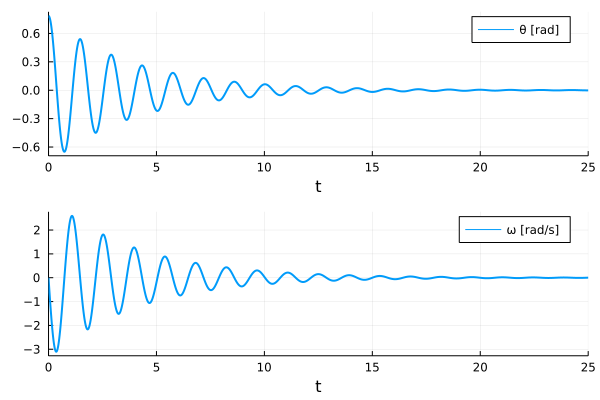

In [62]:
plot(damped_model_solution,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))